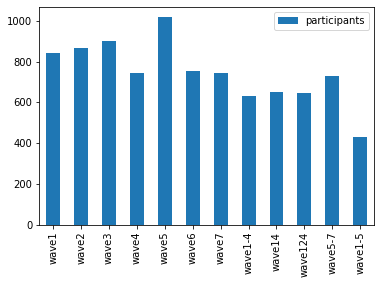

In [207]:
#Notes
#read literature for research question
#check for reverse questions

import numpy as np
import pandas as pd
import datetime
import pandas_profiling as pp
from IPython.display import display, HTML
%matplotlib inline

pd.options.display.max_rows = 10
pd.options.display.width = 200
np.set_printoptions(precision = 4, suppress = True)

legit_classes1 = [67,71,72,74,77,78,79,81,83,86,100,101,103,121,122,125,126,127,129,130,131,133,135,138,139]
legit_classes2 = [73,74,78,81,82,86,100,103,124,125,131,133,135,141,250,251,256,258,259,261,262,263,272,273,277,279,290,291,292,296,297,298,299,300,301,302,303,304,305,306,307,308,310]
participants = pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/8. Metadata/Participant_Info.csv", sep= ';')

par_w1 = participants["W1"] == 1
par_w2 = participants["W2"] == 1
par_w3 = participants["W3"] == 1
par_w4 = participants["W4"] == 1
par_w5 = participants["W5"] == 1
par_w6 = participants["W6"] == 1
par_w7 = participants["W7"] == 1

total1 = len(participants[par_w1])
total2 = len(participants[par_w3])
total3 = len(participants[par_w2])
total4 = len(participants[par_w4])
total5 = len(participants[par_w5])
total6 = len(participants[par_w6])
total7 = len(participants[par_w7])
total1_4 = len(participants[par_w1 & par_w2 & par_w3 & par_w4])
total14 = len(participants[par_w1 & par_w4])
total124 = len(participants[par_w1 & par_w2 & par_w4])
total5_7 = len(participants[par_w5 & par_w6 & par_w7])
total1_5 = len(participants[par_w1 & par_w2 & par_w3 & par_w4 & par_w5])

par_per_wave = pd.DataFrame({
    'participants': [total1, total2, total3, total4, total5, total6, total7, total1_4, total14, total124, total5_7, total1_5]}, index=['wave1', 'wave2', 'wave3', 'wave4', 'wave5', 'wave6', 'wave7', 'wave1-4', 'wave14','wave124', 'wave5-7', 'wave1-5'])

par_per_wave.plot.bar()


#display(participants[par_w1 & par_w2 & par_w3 & par_w4 & par_w5 & par_w6 & par_w7])
#print(participants[par_w1 & par_w2 & par_w3 & par_w4].count)


In [208]:
#getting participants from 1 to 3
participants1_3 = participants[['Child','Class_Y1']][par_w1 & par_w2 & par_w3]
participants1_3 = participants1_3[participants1_3["Class_Y1"].isin(legit_classes1)]
par_13 = participants1_3
participants1_3 = participants1_3["Child"].tolist()
schools = participants['School'][participants['Child'].isin(participants1_3)].unique().tolist()
display(schools)

participants5_7 = participants[['Child', 'Class_Y3']][par_w5 & par_w6 & par_w7]
participants5_7 = participants5_7[participants5_7["Class_Y3"].isin(legit_classes2)]
participants5_7 = participants5_7["Child"].tolist()

[25, 26, 27, 29, 28, 30, 32, 33, 34, 37, 39, 42, 40]

In [209]:
#fit
#compare waves with eachother as percentage for example
fit_clean = pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/5. Fitbit data/Fitbit_W17_cleaned_imputation.csv", sep= ';')
fit_clean1_3 = fit_clean[fit_clean["Child"].isin(participants1_3)]
fit_clean5_7 = fit_clean[fit_clean["Child"].isin(participants5_7)]

fit_clean1_3 = fit_clean1_3[fit_clean1_3["Wave"] <= 3]
fit_clean5_7 = fit_clean5_7[fit_clean5_7["Wave"] > 4]

fit_clean1_3['Date'] = pd.to_datetime(fit_clean1_3['Date'])
fit_clean5_7['Date'] = pd.to_datetime(fit_clean5_7['Date'])

fit_clean1_3['Weekend'] = fit_clean1_3['Date'].dt.day_name()
fit_clean1_3['Weekend'].loc[(fit_clean1_3['Weekend'].isin(['Saturday', 'Sunday']))] = 0
fit_clean1_3['Weekend'].loc[(fit_clean1_3['Weekend'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']))] = 1

fit_clean5_7['Weekend'] = fit_clean5_7['Date'].dt.day_name()
fit_clean5_7['Weekend'].loc[(fit_clean5_7['Weekend'].isin(['Saturday', 'Sunday']))] = 0
fit_clean5_7['Weekend'].loc[(fit_clean5_7['Weekend'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']))] = 1

fit_clean1_3 = fit_clean1_3.drop(columns = ['Day', 'Imputed','Participated', 'Date'])
fit_clean5_7 = fit_clean5_7.drop(columns = ['Day', 'Imputed','Participated', 'Date'])

,Child,Wave,School,Class,Steps,Sex,Age,Weekend_steps,MVPA,Weekend_MVPA
0,1222,1,25,67,6906.333333,1,11.0,3498.0,0.000000,0.000000
1,1222,2,25,67,6047.666667,1,12.0,NaN,10.000000,NaN
2,1222,3,25,67,4186.000000,1,12.0,2273.5,3.333333,0.000000
3,1224,1,25,67,6971.000000,1,12.0,7248.0,22.000000,24.333333
4,1224,2,25,67,9913.600000,1,12.0,NaN,20.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
1132,3191,2,40,135,10548.250000,1,9.0,10799.0,44.250000,40.000000
1133,3191,3,40,135,8701.000000,1,10.0,12417.0,54.666667,111.000000
1134,3192,1,40,135,10895.750000,0,10.0,10097.0,50.500000,31.000000
1135,3192,2,40,135,10053.250000,0,10.0,5043.0,43.250000,0.000000


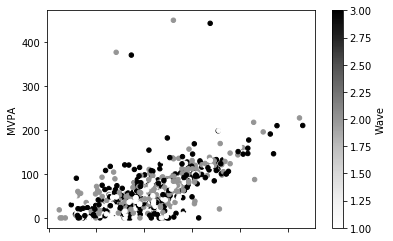

In [210]:
avg_steps_13 = fit_clean1_3[['School', 'Class', 'Child', 'Wave', 'Weekend','Steps', 'Sex', 'Age']].copy()
avg_mvpa_13 = fit_clean1_3[['School', 'Class', 'Child', 'Wave', 'Weekend', 'Minutes_MVPA', 'Sex', 'Age']].copy()

temp = avg_steps_13.groupby(['Child','Wave', 'Weekend']).mean()
temp = temp.reset_index()
weekend_days = temp[['Child', 'Wave','Steps']][temp['Weekend'] == 0]
weekend_days.columns = ['Child', 'Wave', 'Weekend_steps']

avg_steps_13 = avg_steps_13.groupby(['Child', 'Wave']).mean()
avg_steps_13.columns = ['School', 'Class', 'Steps', 'Sex', 'Age']
avg_steps_13 = avg_steps_13.reset_index()
avg_steps_13 = avg_steps_13.merge(weekend_days, how = 'left')

temp = avg_mvpa_13.groupby(['Child','Wave', 'Weekend']).mean()
temp = temp.reset_index()
weekend_mvpa = temp[['Child', 'Wave','Minutes_MVPA']][temp['Weekend'] == 0]
weekend_mvpa.columns = ['Child', 'Wave', 'Weekend_MVPA']

avg_mvpa_13 = avg_mvpa_13.groupby(['Child', 'Wave']).mean()
avg_mvpa_13.columns = ['School', 'Class', 'MVPA', 'Sex', 'Age']
avg_mvpa_13 = avg_mvpa_13.reset_index()
avg_mvpa_13 = avg_mvpa_13.merge(weekend_mvpa, how = 'left')

full_table_13 = avg_steps_13.merge(avg_mvpa_13)

display(full_table_13)
full_table_13.plot.scatter(x = 'Steps', y = 'MVPA', c = 'Wave')

,Child,Wave,School,Class,Steps,Sex,Age,Weekend_steps,MVPA,Weekend_MVPA
0,1414,5,26,74,5461.000000,0,11.0,NaN,66.666667,NaN
1,1414,6,26,74,10157.000000,0,12.0,12940.0,102.333333,123.0
2,1414,7,26,74,5191.333333,0,12.0,4178.0,24.666667,61.0
3,1420,5,26,74,10688.000000,0,12.0,NaN,30.666667,NaN
4,1420,6,26,74,10257.000000,0,12.0,9363.0,50.200000,22.0
...,...,...,...,...,...,...,...,...,...,...
2182,6182,6,60,310,7995.600000,0,12.0,1422.5,39.600000,0.0
2183,6182,7,60,310,6515.400000,0,12.0,4355.0,15.600000,4.5
2184,6183,5,60,310,6896.200000,1,12.0,5137.5,23.600000,26.5
2185,6183,6,60,310,12348.666667,1,12.0,NaN,24.666667,NaN


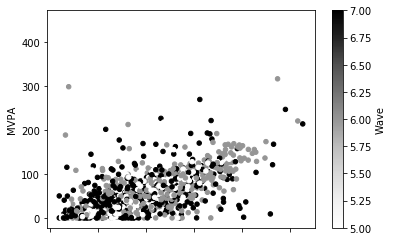

In [211]:
avg_steps_57 = fit_clean5_7[['School', 'Class', 'Child', 'Wave', 'Steps', 'Weekend', 'Sex', 'Age']].copy()
avg_mvpa_57 = fit_clean5_7[['School', 'Class', 'Child', 'Wave', 'Minutes_MVPA', 'Weekend', 'Sex', 'Age']].copy()

temp = avg_steps_57.groupby(['Child','Wave', 'Weekend']).mean()
temp = temp.reset_index()
weekend_days = temp[['Child', 'Wave','Steps']][temp['Weekend'] == 0]
weekend_days.columns = ['Child', 'Wave', 'Weekend_steps']

avg_steps_57 = avg_steps_57.groupby(['Child', 'Wave']).mean()
avg_steps_57.columns = ['School', 'Class', 'Steps', 'Sex', 'Age']
avg_steps_57 = avg_steps_57.reset_index()
avg_steps_57 = avg_steps_57.merge(weekend_days, how = 'left')

temp = avg_mvpa_57.groupby(['Child','Wave', 'Weekend']).mean()
temp = temp.reset_index()
weekend_mvpa = temp[['Child', 'Wave','Minutes_MVPA']][temp['Weekend'] == 0]
weekend_mvpa.columns = ['Child', 'Wave', 'Weekend_MVPA']

avg_mvpa_57 = avg_mvpa_57.groupby(['Child', 'Wave']).mean()
avg_mvpa_57.columns = ['School', 'Class', 'MVPA', 'Sex', 'Age']
avg_mvpa_57 = avg_mvpa_57.reset_index()
avg_mvpa_57 = avg_mvpa_57.merge(weekend_mvpa, how = 'left')

full_table_57 = avg_steps_57.merge(avg_mvpa_57)

display(full_table_57)
full_table_57.plot.scatter(x = 'Steps', y = 'MVPA', c = 'Wave')

In [260]:
## get percentage compared to last one
full_table_13['Steps_ch'] = full_table_13[(full_table_13['Wave'] % 2 == 0) | (full_table_13['Wave'] % 3 == 0)].Steps.pct_change()
full_table_13.loc[1, 'Steps_ch'] = (full_table_13.iloc[1].Steps - full_table_13.iloc[0].Steps) / full_table_13.iloc[0].Steps

full_table_13['MVPA_ch'] = full_table_13[(full_table_13['Wave'] % 2 == 0) | (full_table_13['Wave'] % 3 == 0)].MVPA.pct_change()
full_table_13.loc[1, 'MVPA_ch'] = (full_table_13.iloc[1].MVPA - full_table_13.iloc[0].MVPA) / full_table_13.iloc[0].MVPA

display(full_table_13)

,Child,Wave,School,Class,Steps,Sex,Age,Weekend_steps,MVPA,Weekend_MVPA,S_DI,S_PA,S_GEN,Steps_ch,MVPA_ch
0,1222,1,25,67,6906.333333,1,11.0,3498.0,0.000000,0.000000,4.0,2.0,7.0,NaN,NaN
1,1222,2,25,67,6047.666667,1,12.0,0.0,10.000000,0.000000,1.0,0.0,10.0,-0.124330,inf
2,1222,3,25,67,4186.000000,1,12.0,2273.5,3.333333,0.000000,2.0,3.0,7.0,-0.307832,-0.666667
3,1224,1,25,67,6971.000000,1,12.0,7248.0,22.000000,24.333333,3.0,2.0,9.0,NaN,NaN
4,1224,2,25,67,9913.600000,1,12.0,0.0,20.000000,0.000000,1.0,5.0,9.0,1.368275,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,3191,2,40,135,10548.250000,1,9.0,10799.0,44.250000,40.000000,8.0,9.0,15.0,-0.431443,-0.558970
1133,3191,3,40,135,8701.000000,1,10.0,12417.0,54.666667,111.000000,5.0,10.0,17.0,-0.175124,0.235405
1134,3192,1,40,135,10895.750000,0,10.0,10097.0,50.500000,31.000000,4.0,4.0,11.0,NaN,NaN
1135,3192,2,40,135,10053.250000,0,10.0,5043.0,43.250000,0.000000,3.0,8.0,10.0,0.155413,-0.208841


In [213]:
list = par_13['Child'][par_13["Class_Y1"] == 67].tolist()
temp = fit_clean1_3[fit_clean1_3['Child'].isin(list)]
temp = temp[temp['Wave'] == 1]
temp

,School,Class,Child,Sex,Age,Wave,Steps,Minutes_MVPA,Weekend
1726,25,67,1222,1,11.0,1,12620.0,0.0,1
1727,25,67,1222,1,11.0,1,4601.0,0.0,1
1728,25,67,1222,1,11.0,1,3498.0,0.0,0
1748,25,67,1224,1,12.0,1,8551.0,0.0,0
1749,25,67,1224,1,12.0,1,4951.0,15.0,1
...,...,...,...,...,...,...,...,...,...
2090,25,67,1244,1,11.0,1,9237.0,6.0,1
2091,25,67,1244,1,11.0,1,15727.0,47.0,1
2107,25,67,1246,0,12.0,1,9867.0,49.0,1
2108,25,67,1246,0,12.0,1,7668.0,52.0,0


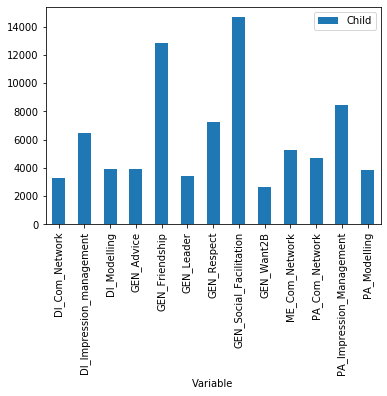

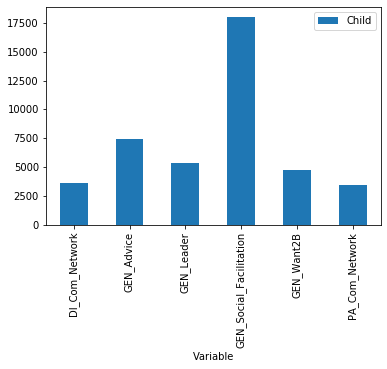

In [214]:
#socio
socio1 = pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/1. Social network data/W1_Sociometric_long.csv", sep= ';')
socio2 = pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/1. Social network data/W2_Sociometric_long.csv", sep= ';')
socio3 = pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/1. Social network data/W3_Sociometric_long.csv", sep= ';')
socio4 = pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/1. Social network data/W4_Sociometric_long.csv", sep= ';')
socio5 = pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/1. Social network data/W5_Sociometric_long.csv", sep= ';')
socio6 = pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/1. Social network data/W6_Sociometric_long.csv", sep= ';')
socio7 = pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/1. Social network data/W7_Sociometric_long.csv", sep= ';')

socio1_3 = socio1.append([socio1, socio2, socio3])
socio5_7 = socio5.append([socio6, socio7])

socio1_3 = socio1_3[socio1_3['Child'].isin(participants1_3)]
socio5_7 = socio5_7[socio5_7['Child'].isin(participants5_7)]

socio_var1= socio1_3[socio1_3["Wave"] == 1].Variable.unique()
socio_var2= socio5_7[socio5_7["Wave"] == 5].Variable.unique()

socio1_3 = socio1_3[socio1_3["Variable"].isin(socio_var1)]
socio5_7 = socio5_7[socio5_7["Variable"].isin(socio_var2)]

soc_count1 = socio1_3.drop(['Wave','Alter'], axis=1) 
soc_count2 = socio5_7.drop(['Wave','Alter'], axis=1)

soc_count1.groupby('Variable').count().plot(kind='bar', stacked=True)
soc_count2.groupby('Variable').count().plot(kind='bar', stacked=True)

socio_DI_13 = socio1_3[socio1_3.Variable.str.contains('^DI')]
socio_GEN_13 = socio1_3[socio1_3.Variable.str.contains('^GEN')]
socio_PA_13 = socio1_3[socio1_3.Variable.str.contains('^PA')]
socio_DI_57 = socio5_7[socio5_7.Variable.str.contains('^DI')]
socio_GEN_57 = socio5_7[socio5_7.Variable.str.contains('^GEN')]
socio_PA_57 = socio5_7[socio5_7.Variable.str.contains('^PA')]

#socio1_3 = socio1_3.reset_index().set_index(['Variable','Child'])
#socio5_7 = socio5_7.reset_index().set_index(['Variable','Child'])

#display(socio_PA_13)
#display(socio_GEN_57)
#print(socio1_3.isnull().sum() & socio5_7.isnull().sum())

In [215]:
#Add socio data to the full table of week 1-3
temp=socio_DI_13.groupby(['Alter', 'Wave'])['Child'].nunique()
temp = temp.reset_index()
temp.columns = ['Child', 'Wave', 'S_DI']

full_table_13 = full_table_13.merge(temp, how = 'left').fillna(0)

temp=socio_PA_13.groupby(['Alter', 'Wave'])['Child'].nunique()
temp = temp.reset_index()
temp.columns = ['Child', 'Wave', 'S_PA']

full_table_13 = full_table_13.merge(temp, how = 'left').fillna(0)

temp=socio_GEN_13.groupby(['Alter', 'Wave'])['Child'].nunique()
temp = temp.reset_index()
temp.columns = ['Child', 'Wave', 'S_GEN']

full_table_13 = full_table_13.merge(temp, how = 'left').fillna(0)
full_table_13

,Child,Wave,School,Class,Steps,Sex,Age,Weekend_steps,MVPA,Weekend_MVPA,S_DI,S_PA,S_GEN
0,1222,1,25,67,6906.333333,1,11.0,3498.0,0.000000,0.000000,4.0,2.0,7.0
1,1222,2,25,67,6047.666667,1,12.0,0.0,10.000000,0.000000,1.0,0.0,10.0
2,1222,3,25,67,4186.000000,1,12.0,2273.5,3.333333,0.000000,2.0,3.0,7.0
3,1224,1,25,67,6971.000000,1,12.0,7248.0,22.000000,24.333333,3.0,2.0,9.0
4,1224,2,25,67,9913.600000,1,12.0,0.0,20.000000,0.000000,1.0,5.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,3191,2,40,135,10548.250000,1,9.0,10799.0,44.250000,40.000000,8.0,9.0,15.0
1133,3191,3,40,135,8701.000000,1,10.0,12417.0,54.666667,111.000000,5.0,10.0,17.0
1134,3192,1,40,135,10895.750000,0,10.0,10097.0,50.500000,31.000000,4.0,4.0,11.0
1135,3192,2,40,135,10053.250000,0,10.0,5043.0,43.250000,0.000000,3.0,8.0,10.0


In [216]:
#Add socio data to the full table of week 5-7
temp=socio_DI_57.groupby(['Alter', 'Wave'])['Child'].nunique()
temp = temp.reset_index()
temp.columns = ['Child', 'Wave', 'S_DI']

full_table_57 = full_table_57.merge(temp, how = 'left').fillna(0)

temp=socio_PA_57.groupby(['Alter', 'Wave'])['Child'].nunique()
temp = temp.reset_index()
temp.columns = ['Child', 'Wave', 'S_PA']

full_table_57 = full_table_57.merge(temp, how = 'left').fillna(0)

temp=socio_GEN_57.groupby(['Alter', 'Wave'])['Child'].nunique()
temp = temp.reset_index()
temp.columns = ['Child', 'Wave', 'S_GEN']

full_table_57 = full_table_57.merge(temp, how = 'left').fillna(0)
full_table_57

,Child,Wave,School,Class,Steps,Sex,Age,Weekend_steps,MVPA,Weekend_MVPA,S_DI,S_PA,S_GEN
0,1414,5,26,74,5461.000000,0,11.0,0.0,66.666667,0.0,2.0,0.0,7.0
1,1414,6,26,74,10157.000000,0,12.0,12940.0,102.333333,123.0,3.0,0.0,4.0
2,1414,7,26,74,5191.333333,0,12.0,4178.0,24.666667,61.0,2.0,0.0,3.0
3,1420,5,26,74,10688.000000,0,12.0,0.0,30.666667,0.0,2.0,0.0,7.0
4,1420,6,26,74,10257.000000,0,12.0,9363.0,50.200000,22.0,2.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,6182,6,60,310,7995.600000,0,12.0,1422.5,39.600000,0.0,1.0,0.0,2.0
2183,6182,7,60,310,6515.400000,0,12.0,4355.0,15.600000,4.5,1.0,0.0,2.0
2184,6183,5,60,310,6896.200000,1,12.0,5137.5,23.600000,26.5,0.0,0.0,0.0
2185,6183,6,60,310,12348.666667,1,12.0,0.0,24.666667,0.0,0.0,0.0,1.0


In [217]:
#beacon
#plan is to probably not use it
beacon = pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/2. Beacon data/Beacon_clean_W17.csv", sep= ';')
beacon13 = beacon[beacon["Wave"].isin([1,2,3])]
beacon57 = beacon[beacon["Wave"].isin([5,6,7])]

beacon13 = beacon13[beacon13["Child"].isin(participants1_3)].set_index('Child')
beacon57 = beacon57[beacon57["Child"].isin(participants5_7)].set_index('Child')

display(beacon13)
display(beacon57)
print(beacon13.isnull().sum() & beacon57.isnull().sum())
#pp.ProfileReport(beacon13)

,Wave,Date,Time,Alter
Child,,,,
1222.0,1.0,27-1-2016,16:15,1394.0
1222.0,1.0,27-1-2016,16:15,1218.0
1222.0,1.0,27-1-2016,16:15,1285.0
1222.0,1.0,28-1-2016,10:00,1225.0
1222.0,1.0,28-1-2016,10:00,1224.0
...,...,...,...,...
3192.0,2.0,18-4-2016,08:31,3148.0
3192.0,2.0,18-4-2016,08:32,3168.0
3192.0,2.0,18-4-2016,15:30,3185.0


,Wave,Date,Time,Alter
Child,,,,
1424.0,7.0,28-6-2018,12:31,1428.0
1428.0,7.0,28-6-2018,12:31,1424.0
1428.0,7.0,2-7-2018,12:15,4365.0
1605.0,5.0,8-3-2018,08:15,4362.0
1605.0,5.0,8-3-2018,08:15,1607.0
...,...,...,...,...
6183.0,6.0,18-4-2018,10:46,6176.0
6183.0,6.0,18-4-2018,10:46,6162.0
6183.0,7.0,28-5-2018,10:45,6162.0


Wave     0
Date     0
Time     0
Alter    0
dtype: int64


In [218]:
#questions
#plan is to remove the dates and just make each of them have a column representing the wave this was in
q_w1= pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/4. Questionnaire data/W1_Main_questions.csv", sep= ';')
q_w2= pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/4. Questionnaire data/W2_Main_questions.csv", sep= ';')
q_w3= pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/4. Questionnaire data/W3_Main_questions.csv", sep= ';')
q_w5= pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/4. Questionnaire data/W5_Main_questions.csv", sep= ';')
q_w6= pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/4. Questionnaire data/W6_Main_questions.csv", sep= ';')
q_w7= pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/4. Questionnaire data/W7_Main_questions.csv", sep= ';')

q_w1 = q_w1[q_w1['Child'].isin(participants1_3)].fillna(0)
q_w2 = q_w2[q_w2['Child'].isin(participants1_3)].fillna(0)
q_w3 = q_w3[q_w3['Child'].isin(participants1_3)].fillna(0)

q_w123 = q_w1.append([q_w2, q_w3])
q_w567 = q_w5.append([q_w6, q_w7]) 

q_w123 = q_w123.set_index('Child').dropna(axis = 'columns')
q_w567 = q_w567.set_index('Child')

q_w123 = q_w123[q_w123.columns.drop(q_w123.filter(regex='TriggerTime'))]
display(q_w123.columns)

Index(['ME_TV_Exposure_TriggerDate', 'ME_TV_Exposure_Weekend', 'ME_TV_Exposure_ME_TV_days', 'ME_TV_Exposure_ME_TV_hours', 'ME_TV_Exposure_ME_expo_TV1', 'ME_TV_Exposure_ME_expo_TV2',
       'ME_TV_Exposure_ME_expo_TV3', 'ME_TV_Exposure_ME_expo_ned1', 'ME_TV_Exposure_ME_expo_ned2', 'ME_TV_Exposure_ME_expo_ned3', 'ME_TV_Exposure_ME_expo_rtl4', 'ME_TV_Exposure_ME_expo_rtl5',
       'ME_TV_Exposure_ME_expo_sbs6', 'ME_TV_Exposure_ME_expo_rtl7', 'ME_TV_Exposure_ME_expo_disnXD', 'ME_TV_Exposure_ME_expo_cartN', 'ME_TV_Exposure_ME_expo_NATG', 'ME_TV_Exposure_ME_expo_Disc_ch',
       'ME_TV_Exposure_ME_expo_MTV', 'ME_TV_Exposure_ME_expo_TLC', 'ME_TV_Exposure_ME_expo_Nick', 'ME_TV_Exposure_ME_expo_rtl8', 'ME_TV_Exposure_ME_expo_Vero', 'ME_TV_Exposure_ME_expo_Net5',
       'PA_Attitude_TriggerDate', 'PA_Attitude_Weekend', 'PA_Attitude_Attitude_PA1', 'PA_Attitude_Attitude_PA2', 'PA_Attitude_Attitude_PA3', 'Fill_happiness_D04_TriggerDate',
       'Fill_happiness_D04_Weekend', 'Fill_happiness_D04_happ